# Cuaderno de apuntes: Regresión lineal con scikit-learn

# ¿Qué es una regresión lineal?

Suponga que tiene dos variables $\vec{x},  \vec{y}$ y $n$ observaciones de esas variables, usted puede representar esos datos en un plano de la siguiente forma:

![Dataset](/root/Platzi/CurReg/Images/62413fa0-3d80-411c-af93-ebd0f096a26a_1042x644.png)  

Una regresión lineal de este conjunto de datos es encontrar coeficientes $m$ y $b$ tales que la ecuación general de la recta se cumpla o en su defecto que $y_k \approx mx_k + b$ para cada $k = 1, 2, ..., n.$  Lo que graficamente se veria así:

![Regresión](/root/Platzi/CurReg/Images/2.png)

Matemáticamente:  

Dados $\vec{y}, \vec{x}_1, \vec{x}_2, ..., \vec{x}_m \in \R^n$, hacer una regresión lineal (multiple) de $\vec{x}$ en función de $\vec{x}_1, \vec{x}_2, ..., \vec{x}_m$ es encontrar $\beta_0, \beta_1, ..., \beta_m, \varepsilon_1, \varepsilon_2, ..., \varepsilon_n \in \R^n$ tales que $y_k = \beta_0 + \beta_1 \vec{x}_1 + ... + \beta_m \vec{x}_m + \varepsilon_k$ para cada $k = 1,2,...,n$. Es decir, poner a cada $y_k$ como una combinación lineal de los $x_{k,t}$ salvo por un pequeño error $\varepsilon_k$ para $k = 1,...,n$. Matricialmente:  

$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix} = \begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n,1} & x_{n,2} & \dots & x_{n,m} \\
\end{bmatrix} \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m
\end{pmatrix} + \begin{pmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{pmatrix}
$  

Es decir:  

$
\vec{y} = [\vec{1} , \vec{x}_1, ..., \vec{x}_n] \vec{\beta} + \vec{\varepsilon}
$  

Además, vamos a suponer que:  
1) $\{ \vec{x}_1, ..., \vec{x}_m \}$ es un conjunto linealmente independiente.
2) $E(\vec{\varepsilon}) = 0$  
3) $\varepsilon_k \backsim  \mathcal{N}(0,\sigma^2)$ para todo $k = 1,...,n$. Es lo mismo decir que $\vec{\varepsilon} \backsim \mathcal{N}(\vec{0}, \sigma^2)$. 
4) $E(\varepsilon_j \varepsilon_k) = 0$ para todo $k,j = 1,..., n$ con $k \neq j$. Es decir que los errores no estan correlacionados.
5) $E(\langle [\vec{x}_1, ..., \vec{x}_m] , \vec{\varepsilon} \rangle) = E([\vec{x}_1, ..., \vec{x}_m]) \cdot E(\vec{\varepsilon})$. Es decir, no hay correlación entre los $\vec{x}_s$ y los $\varepsilon_k$.  

Defina $SSE = ||\vec{\varepsilon}||^2$ y $X = [\vec{1} ,\vec{x}_1, ..., \vec{x}_m]$, el objetivo es minimizarla, es decir, minimizar $(\vec{y}-X\vec{\beta})^T(\vec{y}-X\vec{\beta})$. El siguiente teorema lo soluciona todo:  

$\textbf{Teorema:}$  
Dados $\vec{y}, \vec{x}_1, \vec{x}_2, ..., \vec{x}_m \in \R^n$, con $X = [\vec{1} ,\vec{x}_1, ..., \vec{x}_m]$. Si $\hat{\beta}$ es tal que $X^TX \hat{\beta} = X^T \vec{y}$, entonces (utilizando notación de optimización):  

$\hat{\beta} = \min_{\vec{\beta} \in \R^{m+1}} \left\{ (\vec{y}-X\vec{\beta})^T(\vec{y}-X\vec{\beta}) \right\}$. $\blacksquare$  

En terminos coloquiales: La mejor aproximación lineal de $\vec{y}$ en terminos de $\vec{x_1}, ..., \vec{x}_m$ es $\hat{y} = X(X^TX)^-X^T\vec{y}.$

## Librerias

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')

## Lectura de la base de datos

In [5]:
df = pd.read_csv('../Data/housing_edf82b23-51e2-4f57-887d-6be67da34d27.data', sep='\s+')
df.columns=["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        , -0.70884827, -0.37962716,  0.20517011,  0.24989557],
       [-0.70884827,  1.        ,  0.40625133, -0.39133026, -0.48412584],
       [-0.37962716,  0.40625133,  1.        , -0.21897814, -0.38824941],
       [ 0.20517011, -0.39133026, -0.21897814,  1.        ,  0.69536452],
       [ 0.24989557, -0.48412584, -0.38824941,  0.69536452,  1.        ]])

Lo mas interesante para ajustar linealmente es MEDV con RM

# Primer entrenamiento de un modelo de regresión lineal

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

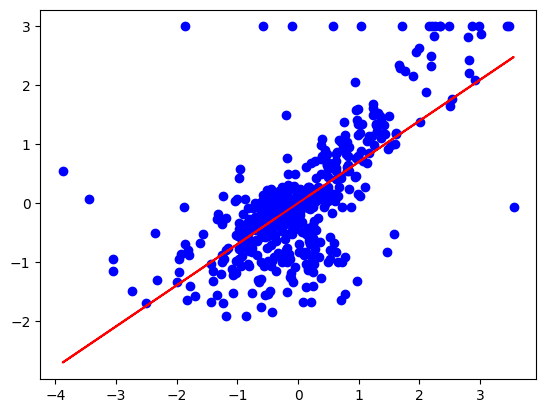

In [8]:
X = df['RM'].values.reshape(-1,1)
Y = df['MEDV'].values.reshape(-1,1)

sc_x=StandardScaler()
sc_y=StandardScaler()

X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

slr = LinearRegression()
slr.fit(X_std, Y_std)

plt.scatter(X_std, Y_std, c='blue')
plt.plot(X_std, slr.predict(X_std), color='red')
plt.show()

Predicción:

In [ ]:
num_hab = 5
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1,1))
print("El precio de una casa con", num_hab, "habitaciones es: ", sc_y.inverse_transform(slr.predict(num_hab_std)))

El precio de una casa con 5 habitaciones es:  [[10.84048987]]


# Cuando utilizar un modelo de regresión lineal

Si:  
1) La variable a predecir es numérica  
2) Las variables independientes de las que depende mi variable a predecir son numéricas  
3) No se cuenta con muchas variables categóricas

# Recomendaciones

1) Si hay que predecir variables numéricas, probar con una regresión lineal, si no es funcional, pasar a otro modelo  
2) Reducir el conjunto de variables lo mas posible y si es necesario, reducir usando SVD  
3) Evitar la multicolinealidad  
4) No predecir fuera del dominio de las variables independientes

# Regresión lineal multivariada

In [10]:
X = df[['RM', 'INDUS']].values
Y = df['MEDV'].values.reshape(-1,1)

sc_x=StandardScaler()
sc_y=StandardScaler()

X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

slr = LinearRegression()
slr.fit(X_std, Y_std)

LinearRegression()

In [11]:
#LIBs
import plotly.express as px
import plotly.graph_objects as go

# TRAINING MODEL
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)


slr = LinearRegression()
slr.fit(X, y)

# PLOTTING
mesh_size = .02
margin = 0

# Create a mesh grid on which we will run our model
x_min, x_max = X[:,0].min() - margin, X[:,0].max() + margin
y_min, y_max = X[:,1].min() - margin, X[:,1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = slr.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

ModuleNotFoundError: No module named 'plotly'